# Esame Laboratorio di Programmazione II - 28/08/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e sul nome con cui salvate il file la vostra matricola.

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domanda e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza ettichette sugli assi o illleggibili sarà valutato meno bene di uno con ettichette chiare.

Commentate il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Supponiamo che i seguenti valori rappresentino il numero di ore di sonno dormite ogni notte nelle ultime **due settimane**:  
**6.5, 5.0, 7.8, 8.2, 4.9, 6.0, 7.0, 7.5, 6.8, 5.5, 8.0, 6.3, 7.2, 5.8**

1. Inserisci questi valori in un array NumPy

2. Crea un nuovo array che assegna un **punteggio di qualità del sonno** secondo le seguenti regole:
   - `1` se il sonno è **inferiore a 6 ore**
   - `2` se è **tra 6 ore (incluse) e meno di 8 ore**
   - `3` se è **8 ore o più**

3. Calcola la **percentuale di notti** per ciascuna fascia di qualità del sonno:
   - Percentuale di notti con punteggio **1** (meno di 6 ore)
   - Percentuale di notti con punteggio **2** (tra 6 e meno di 8 ore)
   - Percentuale di notti con punteggio **3** (8 ore o più)


In [9]:
import numpy as np

# --- 1. Inserisco i dati ---
ore_sonno = np.array([6.5, 5.0, 7.8, 8.2, 4.9, 6.0, 7.0, 7.5, 6.8, 5.5, 8.0, 6.3, 7.2, 5.8])

# --- 2. Creazione array punteggi qualità ---

# Creo un array "vuoto" della stessa lunghezza per ospitare i punteggi
punteggi = np.zeros_like(ore_sonno)

# Applico le regole usando le maschere
punteggi[ore_sonno < 6] = 1
punteggi[(ore_sonno >= 6) & (ore_sonno < 8)] = 2
punteggi[ore_sonno >= 8] = 3

# Stampo
print(f"Array dei punteggi assegnati:\n{punteggi}")


# --- 3. Calcolo percentuali per fascia ---
n_totale = len(punteggi)

# Conto quanti 1, 2 e 3 ci sono
count_1 = np.sum(punteggi == 1)
count_2 = np.sum(punteggi == 2)
count_3 = np.sum(punteggi == 3)

# Calcolo le percentuali
perc_1 = (count_1 / n_totale) * 100
perc_2 = (count_2 / n_totale) * 100
perc_3 = (count_3 / n_totale) * 100

# Stampo
print("\n--- Percentuali Qualità del Sonno ---")
print(f"Punteggio 1 (Scarso): {perc_1:.2f}%")
print(f"Punteggio 2 (Medio):  {perc_2:.2f}%")
print(f"Punteggio 3 (Ottimo): {perc_3:.2f}%")



Array dei punteggi assegnati:
[2. 1. 2. 3. 1. 2. 2. 2. 2. 1. 3. 2. 2. 1.]

--- Percentuali Qualità del Sonno ---
Punteggio 1 (Scarso): 28.57%
Punteggio 2 (Medio):  57.14%
Punteggio 3 (Ottimo): 14.29%


## Esercizio 2
Un’urna contiene 3 palline rosse e 2 blu. A ogni estrazione si rimette la pallina nell’urna.
Quindi ad esempio la propabilità di estarre una pallina rossa è 3/5.
1. Scrivi una funzione che simula N estrazioni e rappresentale con un array NumPy (1 = rosso, 0 = blu).  Esempio: estrazioni_palline(3) = array([0,0,1])
2. Calcola la proporzione cumulativa di palline rosse dopo 10, 20, 30, …, 100 estrazioni. Siignifica ad esempio che per N estrazioni, contiamo quante volte è uscita una pallina rossa e dividiamo per 10.
3. Fai un grafico dell’andamento della proporzione cumulativa in funzione del numero di estrazioni.



Esempio estrazioni(3): [1 0 0]
Proporzioni calcolate: [0.6  0.5  0.63 0.68 0.52 0.62 0.59 0.69 0.59 0.61]


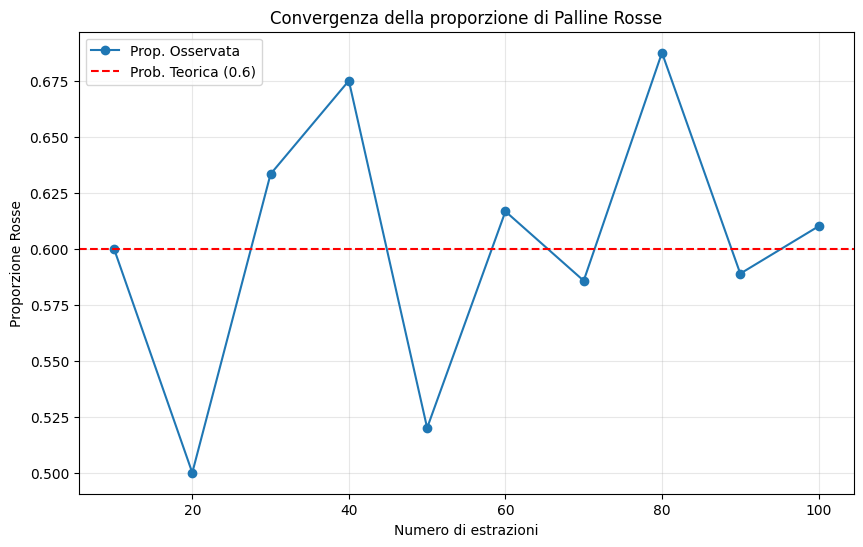

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Imposto il seed per riproducibilità
np.random.seed(0)


# --- 1. Definisco la funzione ---
def simula_estrazioni(n_estrazioni):

    # Probabilità: Rossa (1) = 0.6, Blu (0) = 0.4
    risultati = np.random.choice([1, 0], size=n_estrazioni, p=[0.6, 0.4])
    return risultati

# Test rapido
print(f"Esempio estrazioni(3): {simula_estrazioni(3)}")


# --- 2. Calcolo proporzione cumulativa ---

# Creo gli step: 10, 20, 30 ... fino a 100
step_estrazioni = list(range(10, 101, 10))
proporzioni_rosse = []

# Ciclo attraverso i diversi numeri di estrazioni
for n in step_estrazioni:
    # Eseguo la simulazione con 'n' estrazioni
    campione = simula_estrazioni(n)
    
    # Calcolo la proporzione di Rosse
    prop = np.sum(campione) / n
    proporzioni_rosse.append(prop)

# Stampo i risultati arrotondati
print(f"Proporzioni calcolate: {np.round(proporzioni_rosse, 2)}")


#  --- 3. Grafico dell'andamento ---
plt.figure(figsize=(10, 6))
plt.plot(step_estrazioni, proporzioni_rosse, marker='o', linestyle='-', label='Prop. Osservata')
plt.axhline(y=0.6, color='red', linestyle='--', label='Prob. Teorica (0.6)')

plt.title('Convergenza della proporzione di Palline Rosse')
plt.xlabel('Numero di estrazioni')
plt.ylabel('Proporzione Rosse')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 8 x 8, con valori interi casuali compresi tra -20 e 20 (inclusi).

2. Per ogni riga, seleziona il numero **più vicino a 10**.

In [11]:
import numpy as np

# Seed per riproducibilità
np.random.seed(0)

#  ---- 1. Generazione matrice 8x8 ---
matrice = np.random.randint(-20, 21, size=(8, 8))

# Stampo
print("Matrice generata (prime 2 righe):")
print(matrice[:2]) # Stampo solo l'inizio 


# --- 2. Trovare il numero più vicino a 10 per ogni riga ---

# Calcolo la matrice delle "distanze" da 10
distanze = np.abs(matrice - 10)

# Trovo l'INDICE (la colonna) dove la distanza è minima
indici_minimi = np.argmin(distanze, axis=1)

# Estraggo i valori originali 
numeri_vicini = matrice[np.arange(8), indici_minimi]

# Stampo
print("\nRisultati:")
print(f"Indici colonna dei minimi: {indici_minimi}")
print(f"Numeri più vicini a 10 (uno per riga): {numeri_vicini}")

Matrice generata (prime 2 righe):
[[-20 -17 -17  19 -11  -1   1  16]
 [  3 -14   4   4  -8 -19  18  19]]

Risultati:
Indici colonna dei minimi: [7 2 4 6 0 1 2 1]
Numeri più vicini a 10 (uno per riga): [16  4  5 15  9 11 16 11]


## Esercizio 4  

Utilizza il dataset `movies.csv` (contenente colonne come `title`, `budget`, `revenue`, `vote_average`, `vote_count`).  

1. Elimina le righe con i valori mancanti. e **Crea una nuova colonna** `roi` (return on investment), definita come:  

   $$
   \texttt{roi} = \frac{\texttt{revenue} - \texttt{budget}}{\texttt{budget}}
   $$  

   *(Indica di quanto il film ha guadagnato rispetto al costo di produzione).*  

2. Trova i **5 film con ROI più alto** e stampa `title` e `roi`.  

3. **Filtra i film** che hanno:  
   - `budget` > 50 milioni  
   - `vote_average` > 7  

4. **Crea un grafico a barre** con i **10 film con ROI più alto**.  

5. **Crea uno scatter plot** con:  
   - asse x = `budget`  
   - asse y = `revenue`  
   - colore dei punti = `vote_average`  


Top 5 Film per ritorno sull'investimento (ROI):
                original_title           roi
7447       Paranormal Activity  12889.386667
2449   The Blair Witch Project   9919.000000
242                The Gallows    425.644100
10759                Halloween    232.333333
7437                      Once    128.440706

Numero di Blockbuster di qualità trovati: 86


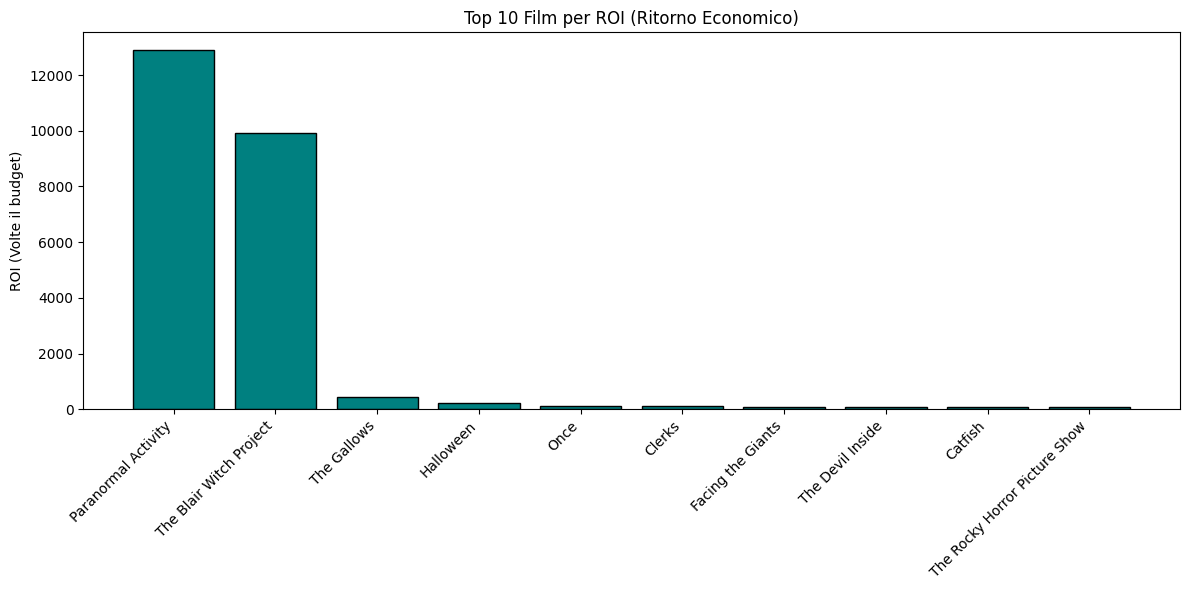

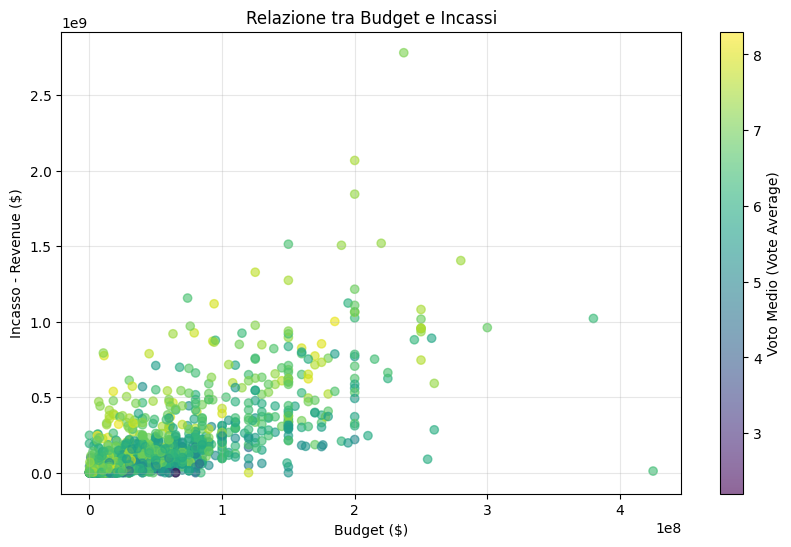

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Caricamento e Pulizia ---
df = pd.read_csv('movies.csv')

# Pulisco i nomi delle colonne per sicurezza 
df.columns = df.columns.str.strip()

# Elimino le righe che hanno valori mancanti (NaN) in generale.
df_clean = df.dropna().copy()

# Imposto una soglia minima (es. 10.000$) per avere dati sensati
df_clean = df_clean[df_clean['budget'] > 10000]

# Creazione Colonna ROI 
df_clean['roi'] = (df_clean['revenue'] - df_clean['budget']) / df_clean['budget']

# --- 2. Top 5 Film per ROI ---

# Ordino dal più grande al più piccolo
top_5_roi = df_clean.sort_values(by='roi', ascending=False).head(5)

# Stampo
print("Top 5 Film per ritorno sull'investimento (ROI):")
print(top_5_roi[['original_title', 'roi']])


# --- 3. Filtro i film ---
filtro_blockbuster = (df_clean['budget'] > 50_000_000) & (df_clean['vote_average'] > 7)
film_filtrati = df_clean[filtro_blockbuster]

# Stampo
print(f"\nNumero di Blockbuster di qualità trovati: {len(film_filtrati)}")


#  --- 4. Grafico a Barre: Top 10 ROI ---

# Preparo i dati: prendo i primi 10
top_10 = df_clean.sort_values(by='roi', ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Bar plot: Titolo sulla X, ROI sulla Y
plt.bar(top_10['original_title'], top_10['roi'], color='teal', edgecolor='black')

# Etichette
plt.title('Top 10 Film per ROI (Ritorno Economico)')
plt.ylabel('ROI (Volte il budget)')
plt.xticks(rotation=45, ha='right') # Ruoto i titoli per leggerli
plt.tight_layout()

# Stampo
plt.show()


#  --- 6. Scatter Plot: Budget vs Revenue (Incasso) ---

# Preparo i dati
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['budget'], df_clean['revenue'], 
                      c=df_clean['vote_average'], cmap='viridis', alpha=0.6)
# Etichette
plt.colorbar(scatter, label='Voto Medio (Vote Average)')
plt.title('Relazione tra Budget e Incassi')
plt.xlabel('Budget ($)')
plt.ylabel('Incasso - Revenue ($)')
plt.grid(True, alpha=0.3)

# stampo
plt.show()

## Esercizio 5  

Utilizza il dataset `movies.csv`.  

1. Quante **righe e colonne** ha il dataset? Successivamente elimina la colonna `overview` dal DataFrame.  
2. Trova il **regista** (`director`) che ha diretto il maggior numero di film.  
3. Calcola il **vote_average medio** per ciascun `director` e ordina i primi 10.  
4. Crea un **boxplot** dei valori di `vote_average` raggruppati per `director` (solo i 5 registi con più film).  
5. Crea un **violin plot** della distribuzione dei `vote_average` per genere (`genres`).  


--- Info iniziali ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 1

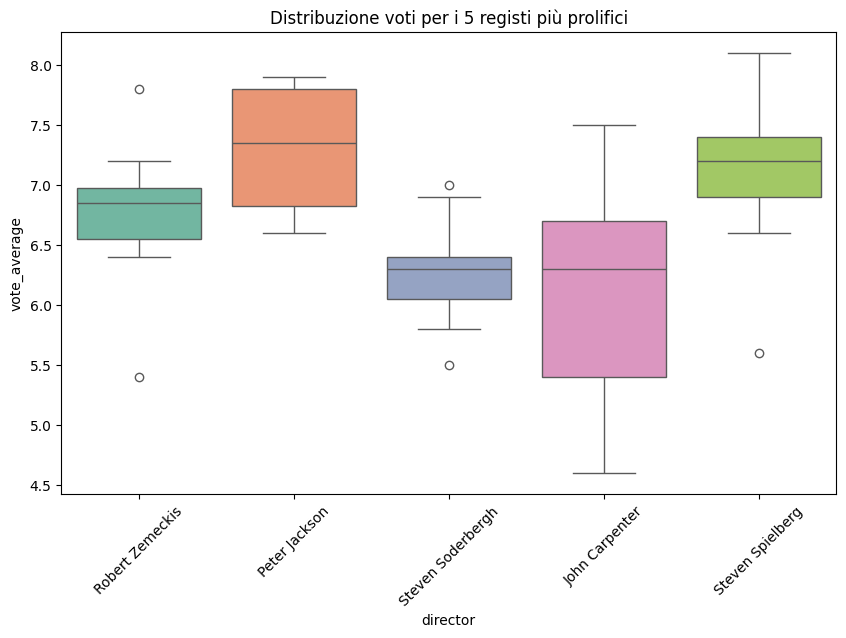

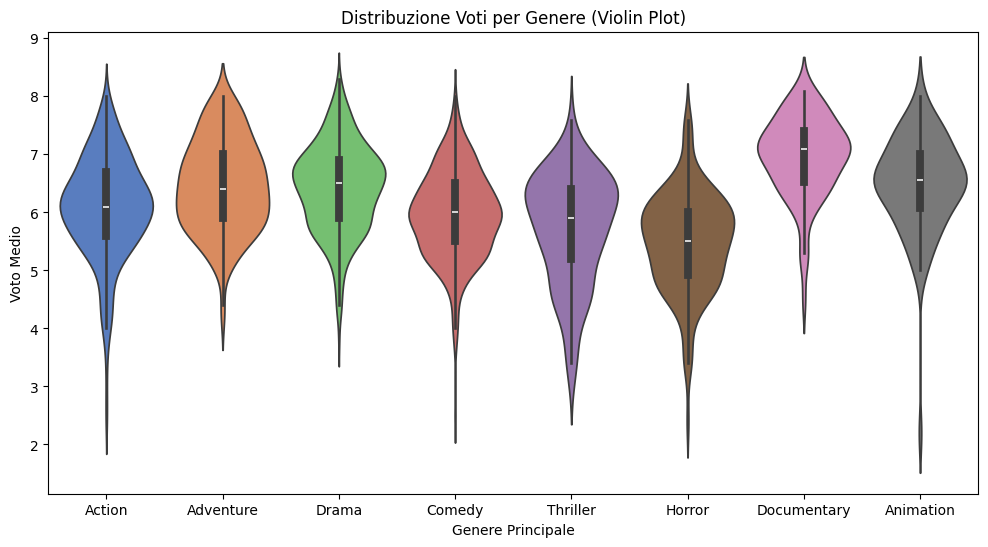

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Righe e colonne Dataset ---

# Caricamento e Pulizia Iniziale
df = pd.read_csv('movies.csv')

# Stampo le info per vedere i valori mancanti
print("--- Info iniziali ---")
print(df.info())

# Elimino la colonna 'overview' 
df.drop(columns=['overview'], inplace=True, errors='ignore')

# Elimino le righe con valori mancanti rimasti
df.dropna(inplace=True)


# --- 2. Il regista con più film ----

regista_top = df['director'].value_counts().idxmax()
num_film = df['director'].value_counts().max()

# Stampo
print(f"\nRegista con più film nel dataset: {regista_top} ({num_film} film)")

# ---- 3. Top 10 Registi per voto medio ---

# Raggruppo per regista, calcolo la media del voto, ordino decrescente
top_registi_rating = df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)

# Stampo
print("\nTop 10 Registi per voto medio:")
print(top_registi_rating)


# --- 4. Boxplot: Voti dei 5 registi con piu film ---

# Trovo i nomi dei 5 registi che hanno fatto più film
nomi_top_5 = df['director'].value_counts().head(5).index

# Filtro il dataset tenendo solo le righe di questi 5 registi
df_top_directors = df[df['director'].isin(nomi_top_5)]

# Etichette
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_directors, x='director', y='vote_average', 
            palette='Set2', hue='director', legend=False)
plt.title('Distribuzione voti per i 5 registi più prolifici')
plt.xticks(rotation=45) # Ruoto i nomi se no si sovrappongono

# Mostro il grafico
plt.show()


# --- 5. Violin Plot per Genere ---

# Prendo solo il primo genere
df['main_genre'] = df['genres'].str.split('|').str[0]

# Per evitare un grafico illeggibile, prendo solo gli 8 generi più comuni
generi_comuni = df['main_genre'].value_counts().head(8).index
df_violin = df[df['main_genre'].isin(generi_comuni)]

# Inserico i dati
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_violin, x='main_genre', y='vote_average', 
               palette='muted', hue='main_genre', legend=False)

# Etichette
plt.title('Distribuzione Voti per Genere (Violin Plot)')
plt.xlabel('Genere Principale')
plt.ylabel('Voto Medio')

# Stampo
plt.show()

## Esercizio 6  

Hai a disposizione il dataset di coppie `(x, y)`  qui sotto riportato.

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta del tipo `y = a * x + b`.  
2. Plotta i punti originali e la retta ottenuta.  
3. Calcola **MAE** e **RMSE** tra i valori reali `y` e quelli stimati dal modello.  


x = np.array([
  0.0, 0.3448, 0.6897, 1.0345, 1.3793, 1.7241,
  2.0690, 2.4138, 2.7586, 3.1034, 3.4483, 3.7931,
  4.1379, 4.4828, 4.8276, 5.1724, 5.5172, 5.8621,
  6.2069, 6.5517, 6.8966, 7.2414, 7.5862, 7.9310,
  8.2759, 8.6207, 8.9655, 9.3103, 9.6552, 10.0
])

y = np.array([
   3.99,  3.33,  8.71,  9.83, 10.69, 14.59,
  11.72, 14.87, 16.06, 13.93, 19.61, 19.83,
  18.40, 20.59, 21.45, 26.51, 24.57, 24.94,
  25.55, 27.78, 28.71, 30.87, 34.14, 34.65,
  35.01, 37.94, 38.53, 41.56, 42.28, 42.65
])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error


# 1. Dati forniti dalla traccia
x = np.array([
  0.0, 0.3448, 0.6897, 1.0345, 1.3793, 1.7241,
  2.0690, 2.4138, 2.7586, 3.1034, 3.4483, 3.7931,
  4.1379, 4.4828, 4.8276, 5.1724, 5.5172, 5.8621,
  6.2069, 6.5517, 6.8966, 7.2414, 7.5862, 7.9310,
  8.2759, 8.6207, 8.9655, 9.3103, 9.6552, 10.0
])

y = np.array([
   3.99,  3.33,  8.71,  9.83, 10.69, 14.59,
  11.72, 14.87, 16.06, 13.93, 19.61, 19.83,
  18.40, 20.59, 21.45, 26.51, 24.57, 24.94,
  25.55, 27.78, 28.71, 30.87, 34.14, 34.65,
  35.01, 37.94, 38.53, 41.56, 42.28, 42.65
])


# 2. Definizione del modello (Retta: y = ax + b)
def retta_lineare(x, a, b):
    return a * x + b


# 3. Fitting dei parametri (Trovo a e b ideali)
popt, _ = curve_fit(retta_lineare, x, y)

# Estraggo i parametri
a_stimato, b_stimato = popt
print(f"Parametri stimati della retta:")
print(f"a (pendenza) = {a_stimato:.4f}")
print(f"b (intercetta) = {b_stimato:.4f}")


# 4. Calcolo le metriche di errore (MAE e RMSE)
y_pred = retta_lineare(x, a_stimato, b_stimato)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Stampo
print(f"\nErrori del modello:")
print(f"MAE (Errore Medio Assoluto): {mae:.4f}")
print(f"RMSE (Radice Errore Quadratico Medio): {rmse:.4f}")

Parametri stimati della retta:
a (pendenza) = 3.7494
b (intercetta) = 4.6959

Errori del modello:
MAE (Errore Medio Assoluto): 1.3703
RMSE (Radice Errore Quadratico Medio): 1.5627
